In [1]:
import pandas as pd
import requests
import os

[api link](https://firms.modaps.eosdis.nasa.gov/mapserver/wfs-info/)

In [2]:
file_path = 'data.csv'
if os.path.exists(file_path):
    print('Yeh')

Yeh


In [3]:
map_key = 'f7e741e40d384d5c93bb33d2973a1823'
url = f'https://firms.modaps.eosdis.nasa.gov/mapserver/wfs/SouthEast_Asia/{map_key}/?SERVICE=WFS&REQUEST=GetFeature&VERSION=2.0.0&TYPENAME=ms:fires_modis_24hrs&STARTINDEX=0&COUNT=1000&SRSNAME=urn:ogc:def:crs:EPSG::4326&BBOX=-90,-180,90,180,urn:ogc:def:crs:EPSG::4326&outputformat=csv'
file_path = 'data.csv'
if not os.path.exists(file_path):
    with open(file_path, 'wb') as f:
        res = requests.get(url)
        f.write(res.content)

In [4]:
status = requests.get(f'https://firms.modaps.eosdis.nasa.gov/mapserver/mapkey_status/?MAP_KEY={map_key}')
status.content

b'{ "transaction_limit" : 1000, "current_transactions": 0, "transaction_interval" : "10 minutes" }'

In [5]:
data = pd.read_csv('./data.csv')
data.head()

WKT  latitude  longitude  brightness  scan  track  \
0  POINT (121.12724 12.67501)  12.67501  121.12724      314.88  4.75   1.99   
1   POINT (125.18774 1.44899)   1.44899  125.18774      315.45  1.52   1.22   
2   POINT (128.69324 1.43828)   1.43828  128.69324      311.88  1.01   1.01   
3  POINT (127.44131 -1.45905)  -1.45905  127.44131      324.48  1.05   1.02   
4  POINT (122.16325 -2.83125)  -2.83125  122.16325      315.51  2.22   1.44   

     acq_date  acq_time            acq_datetime  confidence  brightness_2  \
0  2023-04-27       126  2023/04/27 01:26:00+00          33        292.11   
1  2023-04-27       130  2023/04/27 01:30:00+00           0        296.84   
2  2023-04-27       130  2023/04/27 01:30:00+00           0        295.70   
3  2023-04-27       132  2023/04/27 01:32:00+00           0        298.34   
4  2023-04-27       132  2023/04/27 01:32:00+00           0        288.30   

     frp  
0  55.20  
1  13.90  
2   4.68  
3  15.95  
4  24.86

In [6]:
data['acq_datetime'] = pd.to_datetime(data['acq_datetime'])
data.set_index('acq_datetime', inplace=True)

In [7]:
from scipy.spatial.distance import cdist

In [8]:
generator = data.groupby(pd.Grouper(freq='5Min'), axis=0)

In [10]:
prev_data = None
for name, g in generator:
    
    if prev_data is None:
        prev_data = g
    else:
        prev_point = prev_data[['longitude', 'latitude']].values
        current_point = g[['longitude', 'latitude']].values
        
        dist = cdist(prev_point, current_point)
        break

In [11]:
dist

array([[11.93780488, 13.54652934, 15.48028204, 15.54083061, 19.30575823]])

In [12]:
prev_point

array([[121.12724,  12.67501]])

In [13]:
current_point

array([[125.18774,   1.44899],
       [128.69324,   1.43828],
       [127.44131,  -1.45905],
       [122.16325,  -2.83125],
       [133.13492,  -2.44213]])

In [31]:
from geopy.distance import distance as geodist
import numpy as np

In [24]:
coords_a = data[['latitude', 'longitude']].values

In [26]:
res = cdist(coords_a, coords_a, lambda u, v: geodist(u, v).kilometers)

In [32]:
np.fill_diagonal(res, 9999999)

In [34]:
res.min()

0.11279288268124861

In [16]:
import plotly.express as px
import plotly.graph_objects as go

In [17]:
# fig = px.scatter_geo(data,
#                     lat=data.latitude,
#                     lon=data.longitude,
#                     hover_name="confidence")
# fig.show()

In [18]:
# fig = go.Figure(data=go.Scattergeo(
#         lon = data['longitude'],
#         lat = data['latitude'],
#         text = data['confidence'],
#         mode = 'markers',
#         marker_color = data['confidence'],
#         ))

# fig.update_layout(
#         width = 1200, height=900,
#         title = 'Hot spot',
    
#         geo = dict(scope='asia', showland = True, countrywidth = 0.8, subunitwidth = 0.5)
#     )
# fig.show()

[Example](https://community.plotly.com/t/scatter-mapbox-on-top-of-choropleth-mapbox/63486/2)

```python
map_2d = go.Figure(go.Choroplethmapbox(
                    geojson = json.loads(knox_bg.to_json()),
                    locations = knox_bg.index,
                    z = knox_bg['Population'],
                    colorscale = 'viridis',
                    colorbar_title = 'Population',
                    colorbar_x = -0.2
))
map_2d.update_layout(
    mapbox_style = 'open-street-map',
    height = 550,
    width = 770,
    mapbox_zoom = 9,
    mapbox_center = {'lat':35.99, 'lon':-83.9650}
)

for person in individuals['person_id'].unique():
    map_2d.add_trace(go.Scattermapbox(
        mode = 'markers+lines',
        lon = trajectories[trajectories['person_id'] == person]['longitude'],
        lat = trajectories[trajectories['person_id'] == person]['latitude'],
        marker = {'size': 2},
        name = 'Person ' + str(person)
    ))

map_stores = px.scatter_mapbox(
            data_frame = stores,
            lon = 'Longitude', 
            lat = 'Latitude',
            color = 'Type',
            hover_name = 'Name',
            size_max = 20,
        )

map_2d.add_traces(list(map_stores.select_traces()))
```

In [19]:
# from urllib.request import urlopen
# import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})


[ref](https://stackoverflow.com/questions/67680264/combining-mapbox-choropleth-with-additional-layers-and-markers-in-python-try-to)

In [20]:
import plotly.express as px

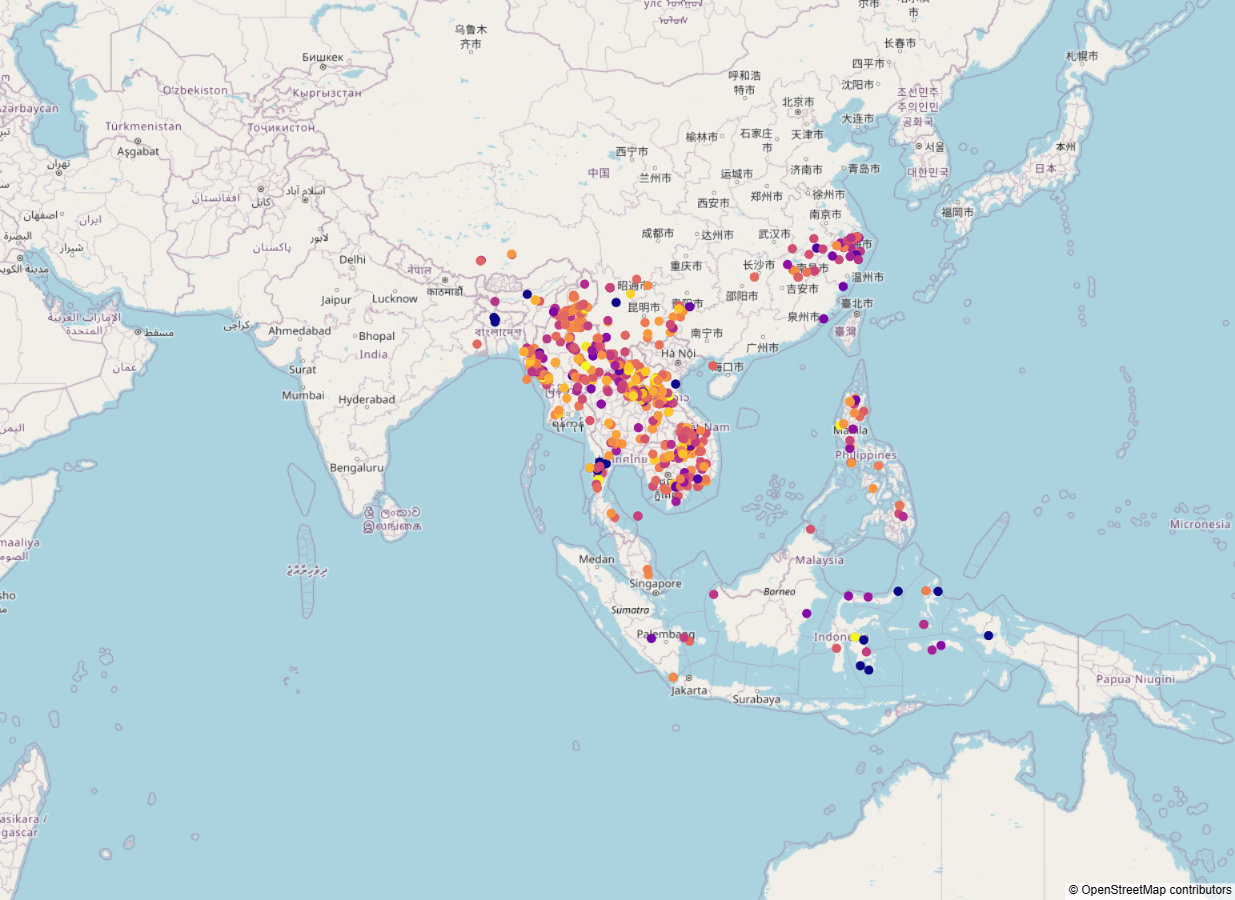

In [21]:
fig = px.choropleth_mapbox(
                           mapbox_style="open-street-map",
                           zoom=3, center = {"lat": 13.736717, "lon": 100.523186},
                           opacity=1,
                           labels={'unemp':'unemployment rate'}
                          )


fig.add_scattermapbox(lon = data['longitude'],
                      lat = data['latitude'],
                      text = data['confidence'],
                      marker=go.scattermapbox.Marker(size=10),
                      marker_color = data['confidence'])

fig.update_layout(width = 1200, height=900,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()